In [1]:
import pandas as pd
ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\banca_06.10_dataset.csv"
df = pd.read_csv(ruta)


In [5]:

def imputar(row):
    if row["housing"] == "yes":
        if row["loan"] == "no" and row["deposit"] == "no":
            return "H"
        if row["loan"] == "yes" and row["deposit"] == "no":
            return "HL"
        if row["loan"] == "no" and row["deposit"] == "yes":
            return "HD"
        if row["loan"] == "yes" and row["deposit"] == "yes":
            return "HLD"
    if row["loan"] == "yes":
        if row["housing"] == "no" and row["deposit"] == "no":
            return "L"
        if row["housing"] == "yes" and row["deposit"] == "no":
            return "HL"
        if row["housing"] == "no" and row["deposit"] == "yes":
            return "LD"
        if row["housing"] == "yes" and row["deposit"] == "yes":
            return "HLD"
    if row["deposit"] == "yes":
        if row["housing"] == "no" and row["loan"] == "no":
            return "D"
        if row["housing"] == "yes" and row["loan"] == "no":
            return "HD"
        if row["housing"] == "no" and row["loan"] == "yes":
            return "LD"
        if row["housing"] == "yes" and row["loan"] == "yes":
            return "HLD"
    else:
        return "none"
    
df["Productos"] = df.apply(imputar, axis=1)
df

,id,age,job,marital,education,default,balance,housing,loan,contact,...,pdays,previous,poutcome,deposit,Clase de edad,Perfil,month_num,date,weekday,Productos
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,...,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday,HD
1,2,56.0,admin.,married,secondary,no,45,no,no,unknown,...,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday,D
2,3,41.0,technician,married,secondary,no,1270,yes,no,unknown,...,-1,0,unknown,yes,35-44,Adultxs,5,2008-05-05,Monday,HD
3,4,55.0,services,married,secondary,no,2476,yes,no,unknown,...,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday,HD
4,5,54.0,admin.,married,tertiary,no,184,no,no,unknown,...,-1,0,unknown,yes,45-54,Divorciadxs,5,2008-05-05,Monday,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26171,26383,35.0,admin.,single,secondary,no,182,yes,no,unknown,...,-1,0,unknown,no,35-44,Adultxs,6,2008-06-03,Tuesday,H
26172,26384,53.0,management,married,unknown,no,527,yes,no,cellular,...,-1,0,unknown,no,45-54,Divorciadxs,7,2008-07-23,Wednesday,H
26173,26385,26.0,student,single,tertiary,no,39,no,no,cellular,...,-1,0,unknown,yes,25-34,Millenials,5,2008-05-26,Monday,D
26174,26386,86.0,retired,married,primary,no,5236,no,no,telephone,...,-1,0,unknown,yes,65+,Gen Z & Boomers,4,2009-04-01,Wednesday,D


Coordenadas de las filas:
              0         1
0      0.262495 -0.174401
1      0.330406  0.136778
2     -0.076956 -0.320674
3      0.279404 -0.233663
4      0.041977  0.178888
...         ...       ...
26171 -0.380473 -0.484300
26172  0.119670 -0.042000
26173 -0.989561  1.186978
26174  1.849167  1.189677
26175 -0.403059 -0.459694

[26176 rows x 2 columns]

Coordenadas de las categorías (columnas):
                             0         1
Clase de edad__18-24 -1.647919  1.976075
Clase de edad__25-34 -0.722359  0.083092
Clase de edad__35-44 -0.080976 -0.417485
Clase de edad__45-54  0.352945 -0.385300
Clase de edad__55-64  1.101625  0.386543
Clase de edad__65+    2.825596  2.125111
job__admin.          -0.242478 -0.459921
job__blue-collar      0.314348 -0.891612
job__entrepreneur     0.209523 -0.476222
job__housemaid        1.147910 -0.017540
job__management      -0.403679  0.498526
job__retired          2.461713  1.526866
job__self-employed   -0.322226  0.218347
job__services      

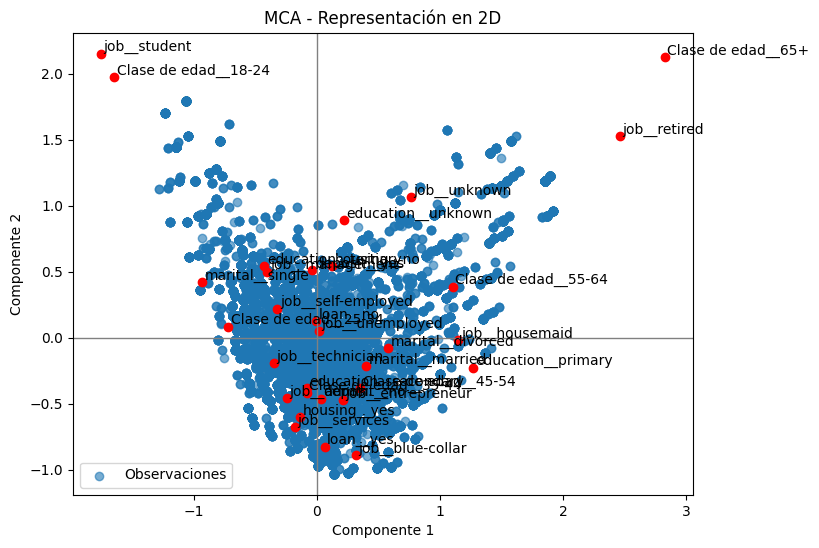

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince


df = df[["Clase de edad","job","marital","education","housing","loan","deposit"]]
# trans = trans[["Clase de edad","job","marital","education","deposit"]]
# Crear DataFrame para graficar
# Ajustar el MCA
mca = prince.MCA(
    n_components=2,
    random_state=42
)

mca = mca.fit(trans)

# Coordenadas de las filas (observaciones en los ejes MCA)
row_coords = mca.row_coordinates(trans)

# Coordenadas de las columnas (categorías en el espacio MCA)
col_coords = mca.column_coordinates(trans)

print("Coordenadas de las filas:")
print(row_coords)

print("\nCoordenadas de las categorías (columnas):")
print(col_coords)

fig, ax = plt.subplots(figsize=(8, 6))

# Puntos de las observaciones
ax.scatter(row_coords[0], row_coords[1], alpha=0.6, label="Observaciones")

# Puntos de las categorías
for i, (x, y) in enumerate(zip(col_coords[0], col_coords[1])):
    ax.scatter(x, y, color="red")
    ax.text(x+0.02, y+0.02, col_coords.index[i], fontsize=10)

ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)
ax.set_title("MCA - Representación en 2D")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
plt.legend()
plt.show()

In [6]:
#CHI2
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

vars_categoricas = ["Perfil", "deposit", "housing", "loan","Productos"]

for v1, v2 in combinations(vars_categoricas, 2):
    tabla = pd.crosstab(df[v1], df[v2])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"{v1} vs {v2} -> Chi2={chi2:.3f}, p={p:.3f}")

Perfil vs deposit -> Chi2=453.546, p=0.000
Perfil vs housing -> Chi2=1214.703, p=0.000
Perfil vs loan -> Chi2=138.555, p=0.000
Perfil vs Productos -> Chi2=1765.079, p=0.000
deposit vs housing -> Chi2=1074.860, p=0.000
deposit vs loan -> Chi2=293.526, p=0.000
deposit vs Productos -> Chi2=26176.000, p=0.000
housing vs loan -> Chi2=163.733, p=0.000
housing vs Productos -> Chi2=26176.000, p=0.000
loan vs Productos -> Chi2=26176.000, p=0.000


In [9]:
#CHI2
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

vars_categoricas = ["Clase de edad","education","marital","job", "deposit", "housing", "loan","Productos"]

for v1, v2 in combinations(vars_categoricas, 2):
    tabla = pd.crosstab(df[v1], df[v2])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"{v1} vs {v2} -> Chi2={chi2:.3f}, p={p:.3f}")

Clase de edad vs education -> Chi2=1991.802, p=0.000
Clase de edad vs marital -> Chi2=6586.248, p=0.000
Clase de edad vs job -> Chi2=18924.243, p=0.000
Clase de edad vs deposit -> Chi2=747.395, p=0.000
Clase de edad vs housing -> Chi2=1424.473, p=0.000
Clase de edad vs loan -> Chi2=225.497, p=0.000
Clase de edad vs Productos -> Chi2=2367.227, p=0.000
education vs marital -> Chi2=841.798, p=0.000
education vs job -> Chi2=16731.161, p=0.000
education vs deposit -> Chi2=319.610, p=0.000
education vs housing -> Chi2=471.054, p=0.000
education vs loan -> Chi2=208.708, p=0.000
education vs Productos -> Chi2=900.497, p=0.000
marital vs job -> Chi2=3068.984, p=0.000
marital vs deposit -> Chi2=261.856, p=0.000
marital vs housing -> Chi2=58.861, p=0.000
marital vs loan -> Chi2=157.928, p=0.000
marital vs Productos -> Chi2=476.685, p=0.000
job vs deposit -> Chi2=862.807, p=0.000
job vs housing -> Chi2=2511.395, p=0.000
job vs loan -> Chi2=515.208, p=0.000
job vs Productos -> Chi2=3765.131, p=0.00

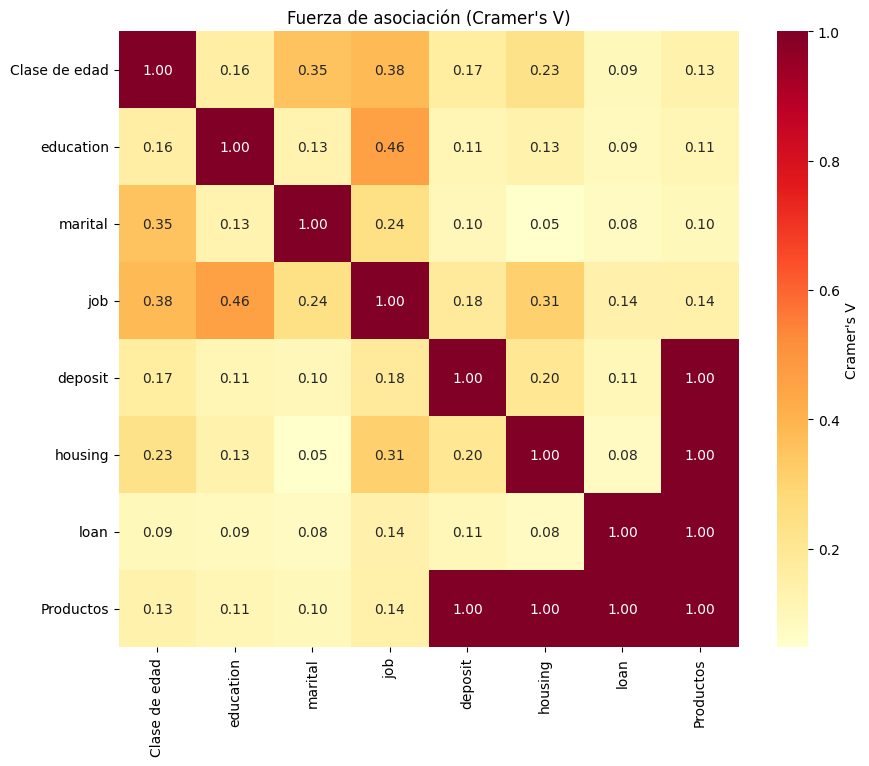

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince

# Matriz vacía para Cramer's V
cramers_matrix = pd.DataFrame(index=vars_categoricas, columns=vars_categoricas)

for v1, v2 in combinations(vars_categoricas, 2):
    tabla = pd.crosstab(df[v1], df[v2])
    chi2, p, dof, expected = chi2_contingency(tabla)
    n = tabla.sum().sum()
    k = min(tabla.shape)  # min filas/cols
    cramers_v = np.sqrt((chi2/n) / (k-1))
    cramers_matrix.loc[v1, v2] = cramers_v
    cramers_matrix.loc[v2, v1] = cramers_v

for v in vars_categoricas:
    cramers_matrix.loc[v, v] = 1.0

cramers_matrix = cramers_matrix.astype(float)

plt.figure(figsize=(10,8))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={"label": "Cramer's V"})
plt.title("Fuerza de asociación (Cramer's V)")
plt.show()

Sale 1 con todas las variables financieras porque productos es una variable derivada de ellas que viene de cruzarlas entre sí, por eso es 1.